In [1]:
print("Importing packages... ", end="")
import numpy as np
from activations import Sigmoid, Tanh, Relu, Softmax
from layers import Input, Dense
from optimizers import Normal, Momentum, Nesterov, AdaGrad, RMSProp, Adam, Nadam
from layers import Input, Dense
from network import NeuralNetwork
from loss import CrossEntropy
from helper import OneHotEncoder, MinMaxScaler

import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("Done!")

map_optimizers = {"Normal":Normal(), "Momentum":Momentum(), "Nesterov":Nesterov(), "AdaGrad":AdaGrad(), "RMSProp":RMSProp(), "Adam":Adam(), "Nadam":Nadam()}

Importing packages... Done!


In [2]:
print("Loading data... ", end="")
[(x_train, y_train), (x_test, y_test)] = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print("Done!")

print("Size of Training data:", x_train.shape)
print("Size of Validation data:", x_val.shape)

print("Performing Scaling and Encoding transformations on the data... ", end="")
scaler = MinMaxScaler()
scaler.fit(x_train)
X_scaled = scaler.transform(x_train)
X_val_scaled = scaler.transform(x_val)
X_test_scaled = scaler.transform(x_test)

X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1]*X_scaled.shape[2]).T
X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1]*X_val_scaled.shape[2]).T
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1]*X_test_scaled.shape[2]).T

encoder = OneHotEncoder()
t = encoder.fit_transform(y_train, 10)
t_val = encoder.fit_transform(y_val, 10)
t_test = encoder.fit_transform(y_test, 10)
print("Done!")

X_scaled = X_scaled[:, :2000]
X_val_scaled = X_val_scaled[:, :500]
t = t[:,:2000]
t_val = t_val[:, :500]

Loading data... Done!
Size of Training data: (48000, 28, 28)
Size of Validation data: (12000, 28, 28)
Performing Scaling and Encoding transformations on the data... Done!


In [3]:
layers = [Input(data=X_scaled), 
          Dense(size=64, activation="Sigmoid", name="HL1"), 
          Dense(size=10, activation="Sigmoid", name="OL")]

model = NeuralNetwork(layers=layers, batch_size=128, optimizer="Normal", \
                      intialization="RandomNormal", loss="CrossEntropy", \
                      epochs=int(100), t=t, X_val=X_val_scaled, t_val=t_val, \
                      use_wandb=False)

model.forward_propogation()
first_pass_y = model.layers[-1].y
model.backward_propogation()

acc_val, loss_val, _ = model.check_test(X_val_scaled, t_val)
acc_test, loss_test, _ = model.check_test(X_test_scaled, t_test)

print("="*50)
print("Training Data")
print("Fraction Correctly classified in untrained network:", np.sum(np.argmax(first_pass_y, axis=0) == y_train[:2000])/2000)
print("Fraction Correctly classified in trained network:", np.sum(np.argmax((model.layers[-1].y), axis=0) == y_train[:2000])/2000)

print("="*50)
print("Validation Data")
print("Fraction Correctly classified in trained network:", acc_val/t_val.shape[1])

print("="*50)
print("Testing Data")
print("Fraction Correctly classified in trained network:", acc_test/t_test.shape[1])

100%|██████████| 100/100 [00:49<00:00,  2.02it/s]==================================================
Training Data
Fraction Correctly classified in untrained network: 0.184
Fraction Correctly classified in trained network: 0.7395
Validation Data
Fraction Correctly classified in trained network: 0.696
Testing Data
Fraction Correctly classified in trained network: 0.6905



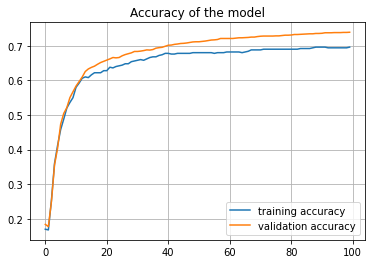

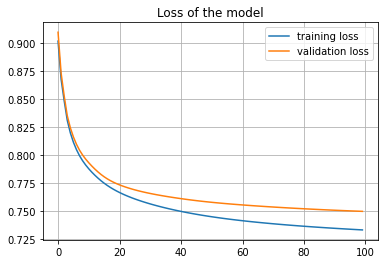

In [4]:
plt.figure()
plt.plot(np.array(model.accuracy_hist_val)/500, label="training accuracy")
plt.plot(np.array(model.accuracy_hist)/2000, label="validation accuracy")
plt.title("Accuracy of the model")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(np.array(model.loss_hist)/2000, label="training loss")
plt.plot(np.array(model.loss_hist_val)/500, label="validation loss")
plt.title("Loss of the model")
plt.legend()
plt.grid()
plt.show()